# Constant Matters

Whether you studied algorithms in college or implemented them in your favorite programming language, you might ask the following questions:

1. Does it work?
2. Is it fast?

To answer the first question, we run the algorithm on multiple test cases to evaluate its correctness. There are formal verification tools to help verify an algorithm's correctness mathematically. (Remember that 'program reasoning' course you took in college? No? Me neither.)

To answer the second question, we run the algorithm a few times and measure the time it takes to run on your machine. However, this approach depends on the hardware, which can vary from machine to machine (e.g., M1 Macs are slower than M2 Macs), so it’s not a reliable evaluation method. In practice, we use [Big O Notation](https://en.wikipedia.org/wiki/Big_O_notation) to model an algorithm's performance as a function of input size.

## What is Big O Notation?

> Big O notation is a mathematical notation that describes the limiting behavior of a function when the argument tends towards a particular
> value or infinity.
>
> \- Wikipedia

Consider the following code snippet. What is the time complexity?

```python
for i in range(n):
    print("hello!")
```

Assuming the print statement is a constant-time operation, we can conclude the time complexity is $O(n)$. But what is a constant-time operation, and how much time is considered constant? The short answer is we don't care. $O(n)$ describes the function's limiting behavior as input size grows. However, in practice, we want our algorithms to perform well for both large and small inputs. **So can we just ignore constants?** Let's consider the following casestudy.

# Sorting Algorithms

Sorting is one of the first algorithms you learn in any data structures and algorithms course. It’s a foundational algorithm that also appears as a preprocessing step in many other algorithms. There are numerous sorting algorithms, and they can be categorized into three classes based on their complexity.

| Complexity | Algorithms |
|------------|------------|
| Quadratic  | selection_sort, insertion_sort, bubble_sort |
| LogLinear  | quick_sort, merge_sort, heap_sort |
| Linear$^1$    | radix_sort |

$^1$ Approximately linear, i.e., $O(k*n)$, where k is the radix of the number system..

In [1]:
from sort import registry

In [2]:
# COMMENT: list all the available sorting algorithms
names = list(registry.keys())
for name in names:
    print(name)

selection_sort
insertion_sort
bubble_sort
quick_sort
merge_sort
heap_sort
radix_sort


In [3]:
import random as rng

# COMMENT: set the seed for reproducible
rng.seed(71)

In [4]:
nums = [rng.randint(-100, 100) for _ in range(10)]
print(nums)

[-18, 30, 58, -98, -33, -61, 93, -49, -33, -78]


In [5]:
sorted_nums = registry[rng.choice(names)](nums)
print(sorted_nums)

[-98, -78, -61, -49, -33, -33, -18, 30, 58, 93]


## Benchmark

Based on time complexity analysis, radix-sort appears to be the most efficient, and algorithms like insertion-sort might seem outdated. Let's test this bold claim with some experiments.

### Experiment 1
1. Generate a random number array of sizes n=10, n=100, and n=10,000.
2. Measure the time each algorithm takes to sort the array.

In [6]:
import time

# COMMENT: Experiment 1
data = {
    'small': [rng.randint(-1e9, 1e9) for _ in range(10)],
    'medium': [rng.randint(-1e9, 1e9) for _ in range(100)],
    'large': [rng.randint(-1e9, 1e9) for _ in range(10000)]
}
results = {size: {} for size in data}
         
for name in names:
    print(f"[LOG] name={name}")
    for size, nums in data.items():
        t1 = time.time_ns()
        registry[name](nums)
        t2 = time.time_ns()
    
        results[size][name] = (t2 - t1) / 1e3 # COMMENT: convert nano seconds to micro seconds

[LOG] name=selection_sort
[LOG] name=insertion_sort
[LOG] name=bubble_sort
[LOG] name=quick_sort
[LOG] name=merge_sort
[LOG] name=heap_sort
[LOG] name=radix_sort


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# COMMENT: convert results into Dataframe
exp1 = pd.DataFrame(results)
exp1

,small,medium,large
selection_sort,8.0,122.0,986211.0
insertion_sort,6.0,128.0,1511822.0
bubble_sort,13.0,191.0,2412954.0
quick_sort,15.0,72.0,8838.0
merge_sort,15.0,83.0,13435.0
heap_sort,17.0,79.0,16548.0
radix_sort,33.0,128.0,10863.0


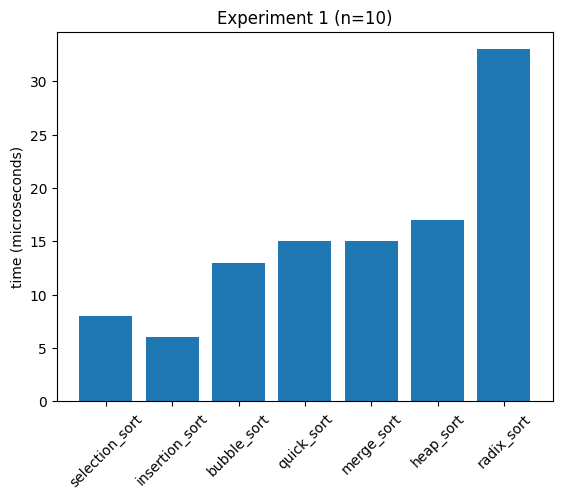

In [9]:
plt.bar(exp1.index, height=exp1.small)
plt.title('Experiment 1 (n=10)')
plt.ylabel('time (microseconds)')
plt.xticks(rotation=45)
plt.savefig('exp1small')

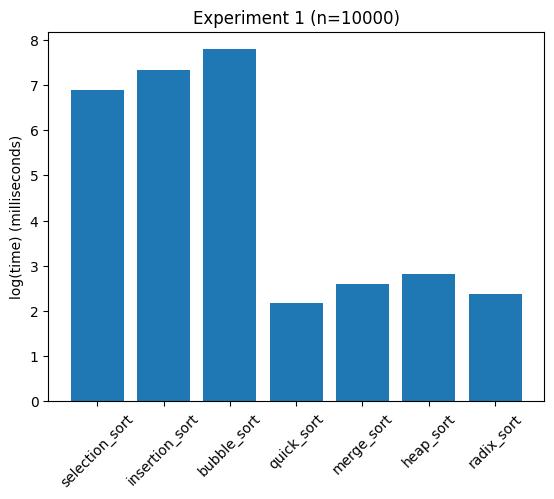

In [10]:
plt.bar(exp1.index, height=np.log(exp1.large / 1e3))
plt.title('Experiment 1 (n=10000)')
plt.ylabel('log(time) (milliseconds)')
plt.xticks(rotation=45)
plt.show()

### Experiment 2
1. Generate a random number array of sizes n=10, n=100, and n=10,000.
2. Arrange the array in reverse order.
3. Measure the time each algorithm takes to sort the array.

In [11]:
import time

# COMMENT: Experiment 2
data = {
    'small': sorted([rng.randint(-1e9, 1e9) for _ in range(10)])[::-1],
    'medium': sorted([rng.randint(-1e9, 1e9) for _ in range(100)])[::-1],
    'large': sorted([rng.randint(-1e9, 1e9) for _ in range(10000)])[::-1]
}
results = {size: {} for size in data}
         
for name in names:
    print(f"[LOG] name={name}")
    for size, nums in data.items():
        try:
            t1 = time.time_ns()
            registry[name](nums)
            t2 = time.time_ns()
            results[size][name] = (t2 - t1) / 1e3 # COMMENT: convert nano seconds to micro seconds

        except RecursionError:
            print(f"[ERR] recursive depth exceeded, size={size}")

[LOG] name=selection_sort
[LOG] name=insertion_sort
[LOG] name=bubble_sort
[LOG] name=quick_sort
[ERR] recursive depth exceeded, size=large
[LOG] name=merge_sort
[LOG] name=heap_sort
[LOG] name=radix_sort


In the worst case, quicksort takes $O(n^2)$ time and requires $O(n)$ stack frames, which can cause a recursion depth exceeded error in Python.

In [12]:
# COMMENT: convert results into Dataframe
exp2 = pd.DataFrame(results)
exp2

,small,medium,large
selection_sort,7.0,103.0,1092890.0
insertion_sort,7.0,249.0,2944516.0
bubble_sort,7.0,250.0,3065079.0
quick_sort,13.0,370.0,NaN
merge_sort,13.0,97.0,11590.0
heap_sort,13.0,72.0,15245.0
radix_sort,28.0,131.0,10051.0


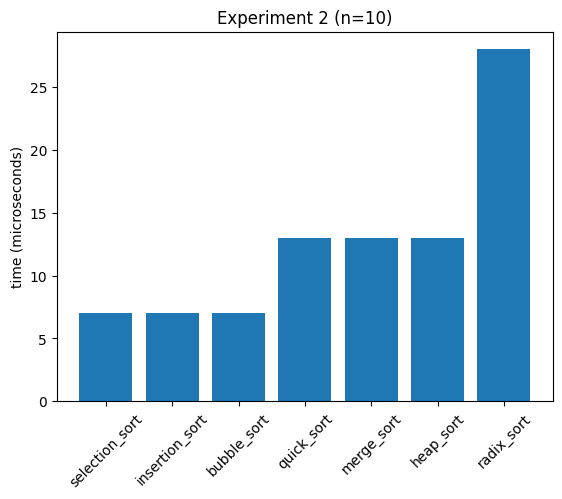

In [13]:
plt.bar(exp2.index, height=exp2.small)
plt.title('Experiment 2 (n=10)')
plt.ylabel('time (microseconds)')
plt.xticks(rotation=45)
plt.show()

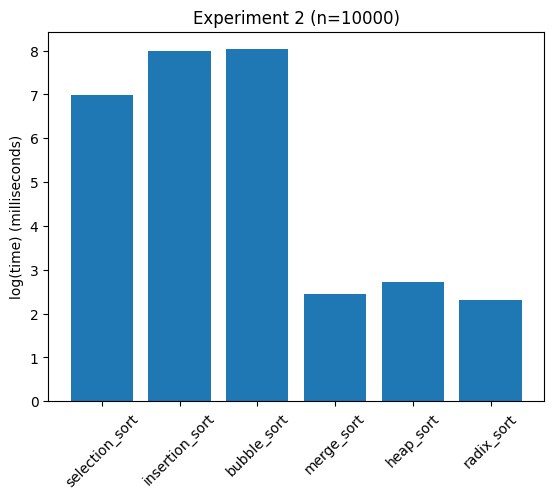

In [14]:
filterd_large = exp2.large[~exp2.large.isna()]
plt.bar(filterd_large.index, height=np.log(filterd_large / 1e3))
plt.title('Experiment 2 (n=10000)')
plt.ylabel('log(time) (milliseconds)')
plt.xticks(rotation=45)
plt.show()

# Conclusion

Although complexity analysis suggests that loglinear and linear time algorithms are faster when n is large (which is confirmed by the experiment), the constant overhead required to achieve these time complexities becomes significant when n is small. Therefore, we need algorithms that perform well in both cases. Indeed, **constants matter** in practice.